In [46]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

## ThingSpeak Library

ThingSpeak (https://thingspeak.com) is a service from MathWorks for recording data in the cloud. If your microcontroller has WiFi you can record data directly from your project to the cloud without a computer as an intermediate, then examine and analyze that data later. To use the library to download some data, you probably need to type

`pip install thingspeak`

at a terminal prompt and pip will install version 0.4.1 of thingspeak, which is abysmally documented at https://media.readthedocs.org/pdf/thingspeak/latest/thingspeak.pdf I mostly faked my way through with a little help by copying almost directly from https://github.com/whatnick/TS_EnergyMonitor/blob/master/LSTM%2BEnergy%2BSeries.ipynb It all seems to work well enough. There are probably lots more options I don't know about.

ThingSpeak channel 363247 has test temperature data that is publicly readable. Field 6 is the one I am using to record temperatures measured in my oven.

### First extract a single field as a time series and plot the data:

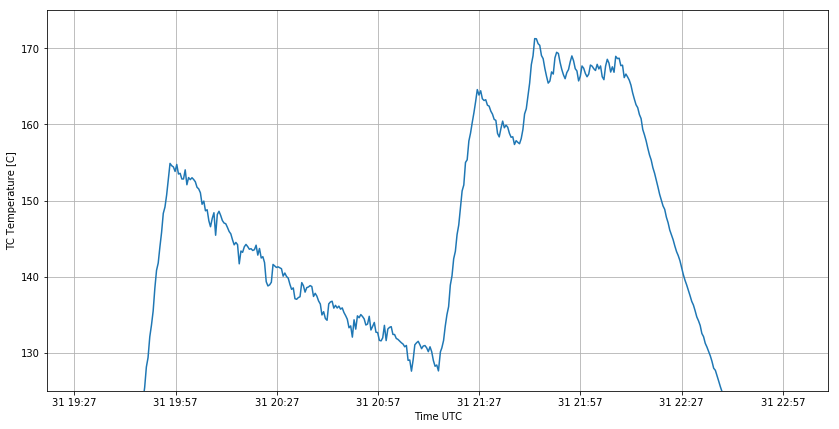

In [61]:
import thingspeak
import json
import datetime

channel_id = 363247
read_key    = "JUHU0ZASRGOXBOZQ"

channel = thingspeak.Channel(id=channel_id,api_key=read_key)

series_json = None
num_results = 800

try:
    series_json = channel.get_field(field='field6', options = {'results': num_results})
except:
    raise
    print("connection failed")

data = json.loads(series_json)

x = list()
y = list()
for entry in data['feeds']:
    if(entry[u'field6'] != None):
        y.append(float(entry[u'field6']))
        x.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))

times = array(x)
oven = array(y)
plot(times,oven)
xlabel("Time UTC")
ylabel("TC Temperature [C]")
ylim(125,175)
grid()